<a href="https://colab.research.google.com/github/kstone16/Notebook-5-StoneK/blob/main/Copy_of_Notebook5_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook \#5: SVM, Perceptron, SGD, and PCA
**Due:** Tuesday 11/9, by 11:59pm

Name:

**Exercises**: \\
Build a **default model** for each of the following and then build a model with **one parameter tuned** (no need to include a graph, just change one parameter that hopefully results in a better model):
1. Support Vector Machines
2. Perceptron
3. Stochastic Gradient Descent
4. Run a PCA on the best model
5. Answer the conclusion questions


In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
data= pd.read_csv('/content/drive/MyDrive/breast-cancer-wisconsin-data.csv')
data.head()

Mounted at /content/drive


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
#we need to drop the last column 'Unnamed: 32'
data.drop(labels='Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


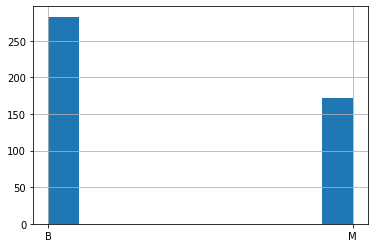

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


predictors = data.columns.drop('diagnosis')
target = "diagnosis"

train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)
#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_sln.hist()
#now you can use train_data, test_data, train_sln, and test_sln

## Exercises:
1. Support Vector Classifier: \\
  a. Default \\
  b. Tuned

In [36]:
from sklearn.svm import SVC
from sklearn import metrics
#Default SVC
clf = SVC()
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


In [37]:
#Tuned SVC:
clf = SVC(kernel='linear')
clf.fit(train_data,train_sln)
predictions = clf.predict(test_data)

#output accuracy
print("accuracy:", metrics.accuracy_score(test_sln, predictions))

#confusion matrix
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

accuracy: 0.9912280701754386
     Pred M  Pred B
T M      39       1
T B       0      74


**There is one false negative! Not ideal!**

2. Perceptron: \\
  a. Default \\
  b. Tuned

In [39]:
from sklearn.linear_model import Perceptron
#Default Perceptron
perc = Perceptron()
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

#output accuracy
print("Cancer accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))

#confusion matrix
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, cancer_perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Cancer accuracy: 0.9824561403508771
     Pred M  Pred B
T M      39       1
T B       1      73


In [40]:
#Tuned Perceptron
perc = Perceptron(random_state = 1000)
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

#output accuracy
print("Cancer accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))

#confusion matrix
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, cancer_perc_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Cancer accuracy: 0.9912280701754386
     Pred M  Pred B
T M      40       0
T B       1      73


**There is one false positive. Better than false negative!**



3. Stochastic Gradient Descent: \\
  a. Default \\
  b. Tuned

In [43]:
from sklearn import linear_model
#Default SGD
gradient = linear_model.SGDClassifier()
gradient.fit(train_data,train_sln)
cancer_gradient_predictions = gradient.predict(test_data)

#output accuracy
print("Cancer accuracy:", metrics.accuracy_score(test_sln, cancer_gradient_predictions))

#confusion matrix
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, cancer_gradient_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Cancer accuracy: 0.9649122807017544
     Pred M  Pred B
T M      38       2
T B       2      72


In [42]:
#Tuned SGD
gradient = linear_model.SGDClassifier(class_weight = 'balanced')
gradient.fit(train_data,train_sln)
cancer_gradient_predictions = gradient.predict(test_data)

#output accuracy
print("Cancer accuracy:", metrics.accuracy_score(test_sln, cancer_gradient_predictions))

#confusion matrix
vals = data[target].unique() ## possible classification values
conf_mat = metrics.confusion_matrix(test_sln, cancer_gradient_predictions, labels=vals)
print(pd.DataFrame(conf_mat, index = "T " + vals, columns = "Pred " + vals))

Cancer accuracy: 0.9824561403508771
     Pred M  Pred B
T M      40       0
T B       2      72


**There are two false positives. Perceptron was the best with only 1 false positive.**

3. Now take the model that performed the best above and run a **principal component analysis** on it. 

In [44]:
#PCA on best model
from sklearn.decomposition import PCA
extractor = PCA(n_components=2, whiten=True)
#When fitting with PCA, you do not use the target column - this is an unsupervised learning algorithm
extractor.fit(train_data)

print('this is the variance/importance of each component')
print(extractor.explained_variance_ratio_)
#Tuned Perceptron
perc = Perceptron(random_state = 1000)
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)

this is the variance/importance of each component
[0.43662428 0.18150759]


In [45]:
print("Here's what the data looks like before being transformed:")
train_data[0:4]

Here's what the data looks like before being transformed:


array([[-0.24207099, -0.36498729, -0.83463794, -0.37044213, -0.42265468,
        -0.41437387, -0.40892601, -0.38027127, -0.45643791, -0.37976688,
        -0.53426485, -1.00722501, -1.35166219, -0.91826389, -0.7581854 ,
        -0.70035103, -0.40772137,  0.05810419, -0.5528159 , -0.53017844,
        -0.58567284, -0.45365506, -1.06177658, -0.41985334, -0.48882443,
        -0.00381561,  0.0295832 ,  0.34707213, -0.25967334,  0.17192889,
        -0.3532633 ],
       [-0.24221592,  0.05208811, -0.26700868, -0.01772895, -0.04633291,
        -2.19428762, -0.99434456, -0.81174734, -0.90244966, -0.63965204,
        -1.01238652, -0.67665163, -1.00795366, -0.64856865, -0.50675818,
        -1.27321035, -0.64147195, -0.76808847, -1.08006164, -1.19358917,
        -0.71798042, -0.00465333, -0.09398457, -0.03673001, -0.10175369,
        -1.67045714, -0.25113922, -0.56957017, -0.60430302, -0.44112743,
        -0.4234167 ],
       [-0.18240965, -0.12582517, -1.43250975, -0.15915297, -0.23777394,
       

In [46]:
train_transformed = extractor.transform(train_data)

print("Here's what the training predictors look like after the transformation.")
train_transformed[0:4]

Here's what the training predictors look like after the transformation.


array([[-0.5623289 , -0.09290783],
       [-0.78404425, -1.08048138],
       [-0.6647039 , -0.3173857 ],
       [-0.6853761 ,  0.13414662]])

In [47]:
#Now we transform the predictor columns in the test set as well.
#Notice that we're using the extractor that we trained using the training set.
#Do not re-fit it to the test data. 
test_transformed = extractor.transform(test_data)

#Now we can use our transformed data with a classifier just like always:
#Tuned Perceptron
perc = Perceptron(random_state = 1000)
perc.fit(train_data,train_sln)
cancer_perc_predictions = perc.predict(test_data)
print("Cancer accuracy:", metrics.accuracy_score(test_sln, cancer_perc_predictions))

Cancer accuracy: 0.9912280701754386


In [48]:
print('Here are the two vectors (in the original space) that define our 2 new axes:')
print(extractor.components_[0])
print(extractor.components_[1])

Here are the two vectors (in the original space) that define our 2 new axes:
[0.00801633 0.21599957 0.09779118 0.22471524 0.21787552 0.15066995
 0.23850604 0.25483043 0.2588698  0.14571762 0.06564588 0.20614032
 0.01852756 0.21401279 0.21735424 0.01633768 0.16355129 0.15696038
 0.18117525 0.04514401 0.09967775 0.22592379 0.10149421 0.23459174
 0.22242397 0.13503571 0.20878094 0.22609303 0.24866746 0.13298777
 0.13425573]
[-0.01719276 -0.23610562 -0.05146421 -0.21631638 -0.23217563  0.17419056
  0.1522026   0.06079395 -0.03924697  0.17104086  0.36688117 -0.09685104
  0.09806609 -0.07099355 -0.14746582  0.22068527  0.24830895  0.21211883
  0.1270988   0.19153466  0.2849052  -0.22574    -0.04064188 -0.20454804
 -0.2231052   0.15851962  0.14215591  0.09842669 -0.01960218  0.11159665
  0.26603432]


## Conclusions:
a. Which model performed the best? Why do you think this model performed the best? \\
*The perceptron model worked the best. I think perceptron probably worked best because in the data set, there are very many data points that are all numeric. If you can find the right amount to weigh each factor based on how predictive of cancer it is, then you should be very effective in predicting the test data. That's what the perceptron model does.*

b. What effect did the principal component analysis have on the accuracy of your best model? Why do you think this is the case?

 The principal component anaysis did not have an effect on the accuracy of the adjusted perceptron model. I think this is the case because there are so many columns in the data set, and the perceptron model assigns the best weight possible to each of them. Combining colunms through feature extraction won't improve the accuracy because you can't do much better than having lots of features and assigning ideal weights to them. However, PCA would be useful if we were trying to reduce the dimensionality.